# Python training for data engineers
## 09 Data Modelling

#### Pre-req

Download the data from [this website](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data). Place it in the folder of this repository.

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2018-04-13 02:46:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [text/plain]
Saving to: ‘crx.data.1’

crx.data.1          100%[===================>]  31.46K  --.-KB/s    in 0.08s   

2018-04-13 02:46:07 (380 KB/s) - ‘crx.data.1’ saved [32218/32218]



#### Creating the dataframe

In [41]:
import pandas as pd
df = pd.read_csv('crx.data')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


Mistake.. The header row contains real data. Skip the header creation by specifying no header should be created.

In [3]:
df = pd.read_csv('crx.data', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,690,3,b,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,690,350,?,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,690,NaN,NaN,NaN,4.75872,4.97816,0,1,2.75,7.2075,28
3,690,4,u,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,690,4,g,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,690,15,c,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,690,10,v,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,690,NaN,NaN,NaN,2.22341,3.34651,0,0.165,1,2.625,28.5
8,690,2,t,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,690,2,f,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [6]:
# Numeric columns
list(df.dtypes[df.dtypes != "object"].index)

[2, 7, 10, 14]

In [7]:
# Categorical columns
list(df.dtypes[df.dtypes == "object"].index)

[0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15]

In [8]:
# Check for missing values in the numeric part of the frame
df[ (df.dtypes[df.dtypes != "object"].index) ].describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [9]:
# Check for missing values in the categorical part of the frame
df[ (df.dtypes[df.dtypes == "object"].index) ].describe()

,0,1,3,4,5,6,8,9,11,12,13,15
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


What are the unique values of the first column?

In [10]:
df[0].unique()

array(['b', 'a', '?'], dtype=object)

In order to use the dataframe for machine learning, we need numbers i.s.o. a character. We need to map the unique values to a number.

In [11]:
mapping = {'b': 1, 'a': 2, '?': 3}

In [12]:
mapping

{'?': 3, 'a': 2, 'b': 1}

In [13]:
# Map the values with the dictionary defined before
df[0] = df[0].map(mapping)

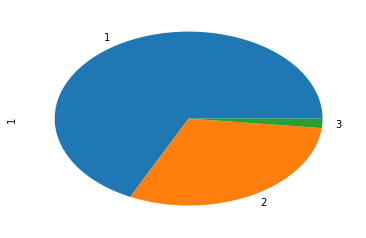

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df.groupby(0).count()[1].plot.pie();

In [15]:
df.dtypes

0       int64
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [16]:
# Or we can convert directly to a category type
df[15] = df[15].astype('category')

In [17]:
# Check if the last column as NaNs
len(df[df[15].isnull()])

0

In [18]:
df.dtypes

0        int64
1       object
2      float64
3       object
4       object
5       object
6       object
7      float64
8       object
9       object
10       int64
11      object
12      object
13      object
14       int64
15    category
dtype: object

### Target

In [19]:
target = df[15]
target.unique()

[+, -]
Categories (2, object): [+, -]

In [20]:
len(target[target == '+'])

307

In [21]:
len(target[target == '-'])

383

In [22]:
type(target)

pandas.core.series.Series

### Features

In [23]:
# Features are the first 14 columns
features = df.loc[:, 0:14]

In [24]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0
1,2,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560
2,2,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824
3,1,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3
4,1,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0
5,1,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0
6,1,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285
7,2,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349
8,1,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314
9,1,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442


In [25]:
features.dtypes

0       int64
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
dtype: object

In [26]:
# Iterate through the columns
for col in features:
    # Check the datatype and convert if it is an object
    if features[col].dtypes == 'object':
        features[col] = features[col].astype('category') 

In [27]:
features.dtypes

0        int64
1     category
2      float64
3     category
4     category
5     category
6     category
7      float64
8     category
9     category
10       int64
11    category
12    category
13    category
14       int64
dtype: object

In [28]:
# Convert the categories into proper features. 
# Categorical data cannot be used to train the model.
for col in features:
    if features[col].dtype.name == 'category':
        features[col] = pd.get_dummies(features[col])

In [29]:
features.dtypes

0       int64
1       uint8
2     float64
3       uint8
4       uint8
5       uint8
6       uint8
7     float64
8       uint8
9       uint8
10      int64
11      uint8
12      uint8
13      uint8
14      int64
dtype: object

In [30]:
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0,0.000,0,0,0,0,1.250,0,0,1,1,1,0,0
1,2,0,4.460,0,0,0,0,3.040,0,0,6,1,1,0,560
2,2,0,0.500,0,0,0,0,1.500,0,1,0,1,1,0,824
3,1,0,1.540,0,0,0,0,3.750,0,0,5,0,1,0,3
4,1,0,5.625,0,0,0,0,1.710,0,1,0,1,0,0,0
5,1,0,4.000,0,0,0,0,2.500,0,1,0,0,1,0,0
6,1,0,1.040,0,0,0,0,6.500,0,1,0,0,1,0,31285
7,2,0,11.585,0,0,0,0,0.040,0,1,0,1,1,0,1349
8,1,0,0.500,0,0,0,0,3.960,0,1,0,1,1,0,314
9,1,0,4.915,0,0,0,0,3.165,0,1,0,0,1,0,1442


In [31]:
features[0].unique()

array([1, 2, 3])

In [32]:
features.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,1.339130,0.001449,4.758725,0.008696,0.008696,0.013043,0.013043,2.223406,0.476812,0.572464,2.40000,0.542029,0.905797,0.191304,1017.385507
std,0.509195,0.038069,4.978163,0.092912,0.092912,0.113543,0.113543,3.346513,0.499824,0.495080,4.86294,0.498592,0.292323,0.393613,5210.102598
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.165000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,2.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,5.000000
75%,2.000000,0.000000,7.207500,0.000000,0.000000,0.000000,0.000000,2.625000,1.000000,1.000000,3.00000,1.000000,1.000000,0.000000,395.500000
max,3.000000,1.000000,28.000000,1.000000,1.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,1.000000,1.000000,100000.000000


### Creating the data sets for training

In [33]:
features.shape

(690, 15)

In [34]:
target.shape

(690,)

### Scaling
Scale the features.

In [35]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
features = scaler.fit_transform(features.as_matrix())

### Test and train
Split into train and test set.

In [36]:
from sklearn.cross_validation import train_test_split #basic train test split
X_train,X_test,y_train,y_test = train_test_split(features, target)

/home/jitsejan/miniconda3/envs/python-101-env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Create a support vector classifier
Just for demonstration purposes, I choose the Support Vector Classifier. Please check the 

In [37]:
from sklearn.svm import LinearSVC # using support vector classifier
svm = LinearSVC(C=0.1)
svm.fit(X_train, y_train)
svm.predict(X_test)
final_score = svm.score(X_train, y_train)
final_score

0.8626692456479691

### Check the confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,svm.predict(X_test))

array([[72,  4],
       [21, 76]])